In [1]:
from gensim.models.keyedvectors import KeyedVectors
import sys

sys.path.append('..')
from utils import*

In [2]:
model_path = '/home/mitya/PycharmProjects/nlp_graph/model.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

### an example of graph representation:

In [3]:
n = 5
text = 'свобода'

vertices = similar_words(text, n)


vertices_list =  [vertices[0] for vertices in vertices]

In [4]:
vertices_list

['свобода_ADJ',
 'самостоятельность_NOUN',
 'свобода_PROPN',
 'независимость_NOUN',
 'несвобода_NOUN']

In [5]:
adj_mat = []
for i in vertices_list:
    for j in vertices_list:
        adj_vec = []
        vec = cosine(model[i], model[j])
        adj_vec.append(vec)
        adj_mat.append(adj_vec)

In [6]:
np.array(adj_mat).reshape(5, 5)

array([[1.0000001 , 0.37957773, 0.38228577, 0.3386654 , 0.42413825],
       [0.37957773, 1.0000001 , 0.17979068, 0.699465  , 0.30720803],
       [0.38228577, 0.17979068, 1.0000001 , 0.28089488, 0.33851472],
       [0.3386654 , 0.699465  , 0.28089488, 0.99999994, 0.26934525],
       [0.42413825, 0.30720803, 0.33851472, 0.26934525, 1.        ]],
      dtype=float32)

In [7]:
G = nx.from_numpy_matrix(np.array(adj_mat).reshape(5, 5))

In [8]:
mapping = dict(zip(G, vertices_list))
H = nx.relabel_nodes(G, mapping)

In [9]:
labels = nx.get_edge_attributes(H,'weight')
pos = nx.spring_layout(H)

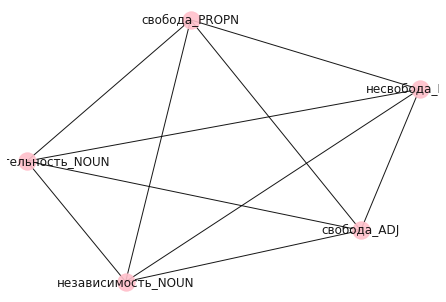

In [10]:
plt.figure()    
nx.draw(H,pos,edge_color='black',width=1,linewidths=1,\
node_size=300,node_color='pink',alpha=0.9,\
labels={node:node for node in H.nodes()})
#x.draw_networkx_edge_labels(H,pos=pos, edge_labels=labels)
plt.show()

### then delete edges by distances below threshold:

In [11]:
labels_filtered = dict()
for (key, value) in labels.items():
    if value <= 0.3:
        labels_filtered[key] = value
    else:
        pass

In [12]:
e = getList(labels_filtered)

In [13]:
for element in e:
    H.remove_edge(*element)

In [14]:
labels = nx.get_edge_attributes(H,'weight')
pos = nx.spring_layout(H)

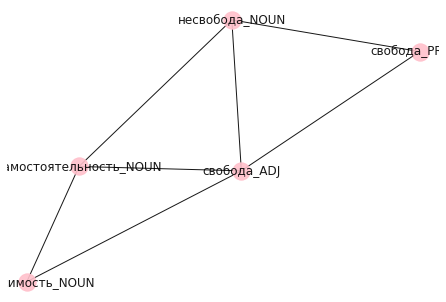

In [15]:
plt.figure()    
nx.draw(H,pos,edge_color='black',width=1,linewidths=1,\
node_size=300,node_color='pink',alpha=0.9,\
labels={node:node for node in H.nodes()})
#nx.draw_networkx_edge_labels(H,pos=pos, edge_labels=labels)
plt.show()